In [119]:
import pandas as pd
import seaborn as sns
import numpy as np

In [120]:
df = sns.load_dataset('tips')
df = df.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [123]:
df.isnull().values.any()

False

In [124]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


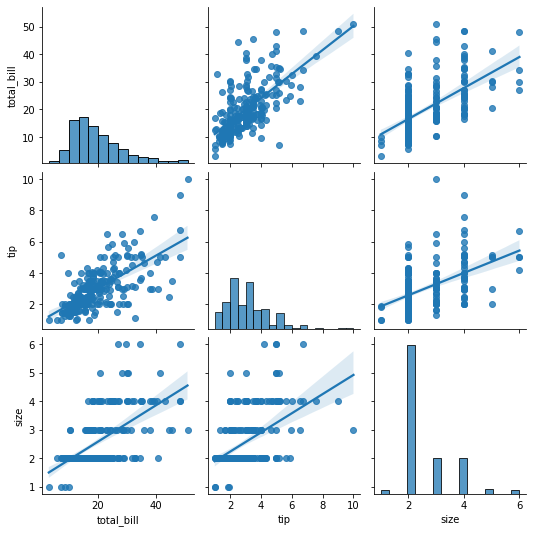

In [125]:
sns.pairplot(data=df, kind='reg');

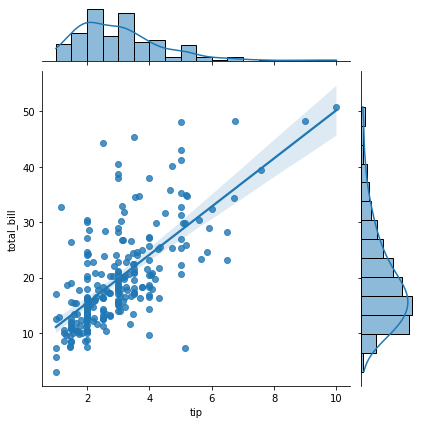

In [126]:
sns.jointplot(data=df, x='tip', y='total_bill', kind='reg');

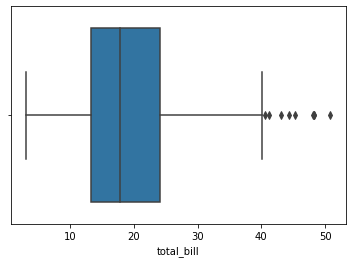

In [127]:
sns.boxplot(data=df, x='total_bill');

# aykırı değerler var fakat bu pratikte aykırı değerlere el atmayacağım.

In [128]:
import statsmodels.api as sm

In [129]:
X = df[['tip']]
X[0:5]

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61


In [130]:
X = sm.add_constant(X)
X[0:5]

,const,tip
0,1.0,1.01
1,1.0,1.66
2,1.0,3.50
3,1.0,3.31
4,1.0,3.61


In [131]:
y = df[['total_bill']]
y[0:5]

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59


In [132]:
lm = sm.OLS(y, X)

In [133]:
model = lm.fit()

In [134]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_bill   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           6.69e-34
Time:                        08:41:57   Log-Likelihood:                -804.77
No. Observations:                 244   AIC:                             1614.
Df Residuals:                     242   BIC:                             1621.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7503      1.006      6.707      0.000       4.768       8.733
tip            4.3477      0.305     14.260      0.000       3.747       4.948
==============================================================================
Omnibus:                       58.831   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.799
Skew:                           1.185   Prob(JB):                     5.87e-27
Kurtosis:                       5.502   Cond. No.                         8.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# pek iç açıcı bir tablo değil.

## r-kare değeri oldukça düşük. bağımsız değişken (tip), bağımlı değişkeni (total_bill) yeterince kuvvetli açıklayamıyor.

## F istatistiği değeri oldukça düşük. F istatistiği, modelin anlamlılığını test etmek için kullanılır. Bu model pek anlamlı gözükmüyor.

### Fakat pratik amaçlı model üzerinde çalışmaya devam edelim.

In [135]:
model.params

# const parametresi basit doğrusal regresyon formülündeki B0 sabit değişkenini ifade ediyor.
# tip değişkeni basit doğrusal regresyon formülündeki B1 sabit değişkenini ifade ediyor.

const    6.750284
tip      4.347714
dtype: float64

In [136]:
model.summary().tables[1]

# katsayılara ilişkin değerler

,coef,std err,t,P>|t|,[0.025,0.975]
const,6.7503,1.006,6.707,0.000,4.768,8.733
tip,4.3477,0.305,14.260,0.000,3.747,4.948


In [137]:
model.conf_int()

# güven aralıkları

,0,1
const,4.767865,8.732702
tip,3.747155,4.948274


In [138]:
model.f_pvalue
print("f_pvalue: ", "%.3f" % model.f_pvalue)

# p value değeri

f_pvalue:  0.000


In [139]:
model.fvalue

# f istatistiği değeri

203.3577233342307

In [140]:
model.mse_model

# modelin hata kareler ortalaması değeri

8793.734128045651

In [141]:
model.tvalues[0:1]

# t value değeri

const    6.707369
dtype: float64

In [142]:
model.rsquared

# r kare değeri

0.45661658635167635

In [143]:
# ---------------------------------------------------------------

In [144]:
model.fittedvalues[0:5]

# modelin tahmin ettiği değerler

0    11.141475
1    13.967489
2    21.967283
3    21.141218
4    22.445532
dtype: float64

In [145]:
y[0:5]

# gerçek değerler

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59


In [146]:
print('Toplam Ödeme = ' + str("%.3f" % model.params[0]) + " + " + "Bahşiş * " + str("%.3f" % model.params[1]))

# basit doğrusal regresyon formülü bu şekildedir.

Toplam Ödeme = 6.750 + Bahşiş * 4.348


Text(0.5, 0, 'Bahşiş')

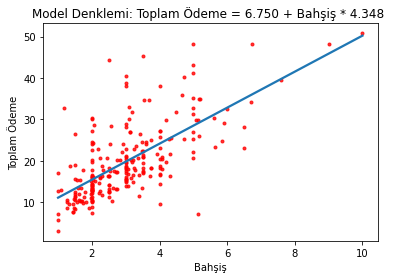

In [147]:
g = sns.regplot(data=df, x='tip', y='total_bill', ci=None, scatter_kws={'color':'r', 's':9})
g.set_title('Model Denklemi: Toplam Ödeme = 6.750 + Bahşiş * 4.348 ')
g.set_ylabel('Toplam Ödeme')
g.set_xlabel('Bahşiş')

In [148]:
# Sklearn ile model oluşturalım.

In [149]:
from sklearn.linear_model import LinearRegression

In [150]:
X = df[['tip']]
y = df['total_bill']
reg = LinearRegression()

model = reg.fit(X, y)
model.intercept_, model.coef_
# Formüldeki B0 ve B1 katsayıları

(6.750283771267842, array([4.34771421]))

In [151]:
model.score(X,y)

# r kare değeri

0.45661658635167635

In [152]:
model.predict(X)[0:5]

array([11.14147512, 13.96748936, 21.9672835 , 21.1412178 , 22.44553206])

In [153]:
y[0:5]

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64

In [155]:
df = pd.DataFrame({
    'gercek_y': y[0:10],
    'tahmin_y': reg.predict(X)[0:10]
})

df

,gercek_y,tahmin_y
0,16.99,11.141475
1,10.34,13.967489
2,21.01,21.967283
3,23.68,21.141218
4,24.59,22.445532
5,25.29,27.228018
6,8.77,15.445712
7,26.88,20.315152
8,15.04,15.271804
9,14.78,20.793401
